In [16]:
import pandas as pd
from copy import deepcopy
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

# plt.switch_backend('Qt5Agg')
# %matplotlib

plt.rcParams['figure.figsize'] = [20, 10]
font = {'weight' : 'normal',
        'size'   : 24}
dpi = 300
matplotlib.rc('font', **font)

def ci(data):
    sdata = sorted(data.dropna())
    n = len(sdata)
    # z = 1.96 # 95%
    z = 2.576 # 99%
    # z = 3.291 # 99.9%
    lower_pos = math.floor((n - z*math.sqrt(n))/2)
    upper_pos = math.ceil(1 + (n + z*math.sqrt(n))/2)
    return sdata[lower_pos-1], sdata[upper_pos-1]

def calculate_ci(df):
    cols_to_use = [i for i in range(1, 20)]
    df['min_time']    = df.loc[:, cols_to_use].min(axis=1, skipna=True)
    df['max_time']    = df.loc[:, cols_to_use].max(axis=1, skipna=True)
    df['median_time'] = df.loc[:, cols_to_use].median(axis=1, skipna=True)
    df['mean_time']   = df.loc[:, cols_to_use].mean(axis=1, skipna=True)
    df['std_time']    = df.loc[:, cols_to_use].std(axis=1, skipna=True)
    
    df['ci']               = df.loc[:, cols_to_use].apply(lambda x: ci(x), axis=1)
    df[['cimin', 'cimax']] = pd.DataFrame(df['ci'].tolist(), index=df.index)
    df['cimin_p']          = df['cimin']    / df['median_time']
    df['cimax_p']          = df['cimax']    / df['median_time']
    
    return df


In [19]:
df_m = pd.read_csv('../matlab/results/matlab.txt', delimiter='\t')
df_j = pd.read_csv('../julia/results/julia.txt', delimiter=';')
df_c = pd.read_csv('../c/results/c.txt', delimiter=';')
df_cppa = pd.read_csv('../cpp/armadillo/results/armadillo.txt', delimiter=';')
df_cppe = pd.read_csv('../cpp/eigen/results/eigen.txt', delimiter=';')
df_py = pd.read_csv('../python/results/python.txt', delimiter=';')
df_r = pd.read_csv('../r/results/R.txt', delimiter=';')
df_o = pd.read_csv('../octave/results/octave.txt', delimiter=' ')
df_o
# df_temp['algorithm'] = df_temp['algorithm'].apply(lambda x: x.split('_')[0]+'_implicit')
# df_c = df_c.append(df_temp, ignore_index=True)

df_merged = pd.merge(df_m[['algorithm', 'Min']], df_j[['algorithm','Julia']], on='algorithm', how='outer')
df_merged.rename(columns={'Min': 'Matlab'}, inplace=True)

df_merged = pd.merge(df_merged, df_c[['algorithm','C']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_cppa[['algorithm','Armadillo']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_cppe[['algorithm','Eigen']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_py[['algorithm','Python']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_r[['algorithm','R']], on='algorithm', how='outer')
df_merged = pd.merge(df_merged, df_o[['algorithm','Octave']], on='algorithm', how='outer')
df_merged.rename(columns={'Armadillo': 'Arma'}, inplace=True)

df_merged = df_merged.reindex(columns=['algorithm', 'C', 'Arma', 'Eigen', 'Julia', 'Matlab', 'Python', 'Octave', 'R'])
# df_merged
# df_merged.sort_values('algorithm').reset_index(drop=True)

In [20]:
df_j_t = pd.read_csv('../julia/results/julia_timings.txt', delimiter=';', header=None)
df_m_t = pd.read_csv('../matlab/results/matlab_timings.txt', delimiter='\t', header=None).iloc[1:]
df_cppa_t = pd.read_csv('../cpp/armadillo/results/armadillo_timings.txt', delimiter=';', header=None)
df_cppe_t = pd.read_csv('../cpp/eigen/results/eigen_timings.txt', delimiter=';', header=None)
df_py_t = pd.read_csv('../python/results/python_timings.txt', delimiter=';', header=None)
df_r_t = pd.read_csv('../r/results/R_timings.txt', delimiter=';', header=None)


In [24]:
keywords = ['solve_spd', 'solve_sym', 'solve_tri', 'solve_dia']
df_merged[df_merged['algorithm'].isin(keywords)].round(2).to_csv('linear_solve', sep=' & ')

In [5]:
keywords = ['solve_nai', 'solve_rec']
df_merged[df_merged['algorithm'].isin(keywords)].round(2)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
22,solve_nai,1.71,0.63,2.21,1.69,1.76,2.23,1.82,2.20
23,solve_rec,0.61,0.63,0.64,0.63,0.71,0.65,0.72,0.68


In [6]:
keywords = ['gemm_explicit', 'gemm_implicit_noup', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff', 'gemm_implicit_compact']
df_merged[df_merged['algorithm'].isin(keywords)].round(2)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
8,gemm_implicit,0.27,0.29,0.29,0.30,0.29,0.29,0.31,0.31
9,gemm_implicit_noup,0.27,0.26,0.29,0.28,0.28,0.28,0.28,0.28
10,gemm_implicit_coeff,NaN,0.29,0.29,0.31,0.29,0.30,0.31,0.32
11,gemm_implicit_double_coeff,NaN,0.29,0.29,0.34,0.29,0.32,0.34,0.33
45,gemm_implicit_compact,NaN,0.26,0.29,0.30,NaN,0.29,NaN,NaN
46,gemm_explicit,0.27,NaN,NaN,0.26,NaN,0.28,NaN,NaN


In [7]:
keywords = ['syrk_implicit', 'syrk_implicit_noup', 'syrk_explicit_noup', 'syrk_implicit_compact', 'syrk_explicit', 'syrk_implicit_compact', 'gemm_explicit']
df_merged[df_merged['algorithm'].isin(keywords)].round(2)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
6,syrk_implicit,NaN,0.17,0.29,0.21,0.18,0.18,0.20,0.32
7,syrk_implicit_noup,NaN,0.15,0.29,0.16,0.17,0.17,0.17,0.29
42,syrk_implicit_compact,NaN,0.17,0.29,0.22,NaN,0.18,NaN,NaN
43,syrk_explicit,0.14,NaN,NaN,0.13,NaN,0.14,NaN,NaN
44,syrk_explicit_noup,0.14,NaN,NaN,0.13,NaN,NaN,NaN,NaN
46,gemm_explicit,0.27,NaN,NaN,0.26,NaN,0.28,NaN,NaN


In [8]:
keywords = ['syr2k_implicit', 'syr2k_implicit_noup', 'syr2k_explicit_noup','syr2k_implicit_compact', 'syr2k_explicit', 'syr2k_implicit_compact', 'gemm_explicit']
df_merged[df_merged['algorithm'].isin(keywords)].round(2)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
14,syr2k_implicit,NaN,0.57,0.58,0.69,0.57,0.58,0.63,0.60
15,syr2k_implicit_noup,NaN,0.57,0.56,0.59,0.57,0.57,0.60,0.56
46,gemm_explicit,0.27,NaN,NaN,0.26,NaN,0.28,NaN,NaN
51,syr2k_implicit_compact,NaN,0.57,0.56,0.70,NaN,0.58,NaN,NaN
52,syr2k_explicit,0.28,NaN,NaN,0.27,NaN,0.28,NaN,NaN
53,syr2k_explicit_noup,0.28,NaN,NaN,0.27,NaN,NaN,NaN,NaN


In [9]:
keywords = ['trmm_implicit', 'gemm_explicit_large', 'trmm_explicit', 'trmm_implicit_compact', 'diagmm']
df_merged[df_merged['algorithm'].isin(keywords)].round(2)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
12,trmm_implicit,0.75,1.44,1.46,0.75,1.44,1.45,1.48,1.47
13,diagmm,0.06,1.43,1.46,0.04,1.44,1.44,0.03,1.47
49,trmm_implicit_compact,NaN,1.44,1.46,0.76,NaN,NaN,NaN,NaN
50,trmm_explicit,0.75,NaN,NaN,0.73,NaN,0.76,NaN,NaN
58,gemm_explicit_large,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
keywords = ['mc_l_r_orig', 'mc_l_r_guid', 'mc_r_l_orig', 'mc_r_l_guid', 'mc_mixed_orig', 'mc_mixed_guid']
df_merged[df_merged['algorithm'].isin(keywords)].round(2)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
24,mc_l_r_orig,NaN,0.06,0.06,0.06,0.06,0.06,0.06,0.06
25,mc_l_r_guid,NaN,0.06,0.06,0.06,0.06,0.06,0.06,0.06
26,mc_r_l_orig,NaN,0.06,0.43,0.42,0.42,0.43,0.43,0.43
27,mc_r_l_guid,NaN,0.06,0.06,0.05,0.05,0.06,0.06,0.06
28,mc_mixed_orig,NaN,0.32,0.35,0.33,0.33,0.33,0.34,0.32
29,mc_mixed_guid,0.21,0.21,0.24,0.22,0.22,0.22,0.22,0.21


In [10]:
keywords = ['subexpr_nai', 'subexpr_rec']
df_merged[df_merged['algorithm'].isin(keywords)].round(2)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
20,subexpr_nai,0.54,0.52,0.59,0.55,0.57,0.56,0.60,0.56
21,subexpr_rec,0.28,0.27,0.31,0.30,0.28,0.30,0.31,0.31


In [15]:
keywords = ['loop_nai', 'loop_rec']
df_merged[df_merged['algorithm'].isin(keywords)].round(5)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
36,loop_nai,NaN,0.00266,0.00312,0.00280,0.00282,0.00320,0.00427,0.00464
37,loop_rec,NaN,0.00007,0.00007,0.00008,0.00008,0.00011,0.00094,0.00011


In [12]:
keywords = ['compact', 'blocked']
df_merged[df_merged['algorithm'].isin(keywords)].round(2)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
40,compact,NaN,2.06,2.13,2.10,2.22,2.23,2.22,2.21
41,blocked,NaN,0.97,0.98,0.98,1.01,1.06,1.06,1.03


In [18]:
keywords = ['add', 'scal']
df_merged[df_merged['algorithm'].isin(keywords)].round(2)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
0,add,NaN,NaN,NaN,NaN,0.03,NaN,0.03,NaN
1,scal,NaN,NaN,NaN,NaN,0.02,NaN,0.02,NaN


In [15]:
keywords = ['tr_nn_implicit', 'tr_nt_implicit', 'tr_tn_implicit', 'tr_tt_implicit', 'tr_nn_explicit', 'tr_nt_explicit', 'tr_tn_explicit', 'tr_tt_explicit']
df_merged[df_merged['algorithm'].isin(keywords)].round(6)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,R
14,tr_nn_implicit,NaN,0.000063,0.000074,0.000079,0.000079,0.000088,0.000099
15,tr_tn_implicit,NaN,0.000064,0.000075,0.000079,0.000080,0.000090,0.000126
16,tr_nt_implicit,NaN,0.000064,0.000074,0.000077,0.000079,0.000090,0.000128
17,tr_tt_implicit,NaN,0.000064,0.000075,0.000079,0.000080,0.000092,0.000147
48,tr_nn_explicit,0.000050,NaN,NaN,0.000075,NaN,0.000107,NaN
49,tr_tn_explicit,0.000051,NaN,NaN,0.000075,NaN,0.000108,NaN
50,tr_nt_explicit,0.000051,NaN,NaN,0.000075,NaN,0.000108,NaN
51,tr_tt_explicit,0.000051,NaN,NaN,0.000075,NaN,0.000110,NaN


In [17]:
keywords = ['diag_nai', 'diag_rec', 'diag_nai_mult', 'gemm_explicit_large']
df_merged[df_merged['algorithm'].isin(keywords)].round(4)

,algorithm,C,Arma,Eigen,Julia,Matlab,Python,Octave,R
32,diag_nai,NaN,0.0001,0.0005,0.0291,0.0298,0.0289,0.0291,0.0170
33,diag_rec,NaN,0.0001,0.0005,0.0001,0.0001,0.0005,0.0001,0.0002
58,gemm_explicit_large,1.4609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,diag_nai_mult,NaN,1.4422,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# dataframes = [df_j_t, df_m_t, df_cppa_t, df_cppe_t, df_py_t, df_r_t]
# for i, d in enumerate(dataframes):
#     dataframes[i] = calculate_ci(dataframes[i])
# df_merged_t = pd.merge(df_j_t[[0, 'ci']], df_m_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_cppa_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_cppe_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_py_t[[0, 'ci']], on=0, how='outer')
# df_merged_t = pd.merge(df_merged_t, df_r_t[[0, 'ci']], on=0, how='outer')

# df_merged_t.columns = ['algorithm', 'Julia', 'Matlab', 'Arma', 'Eigen', 'Python', 'R']

Text(0.5, 1.0, 'Julia')

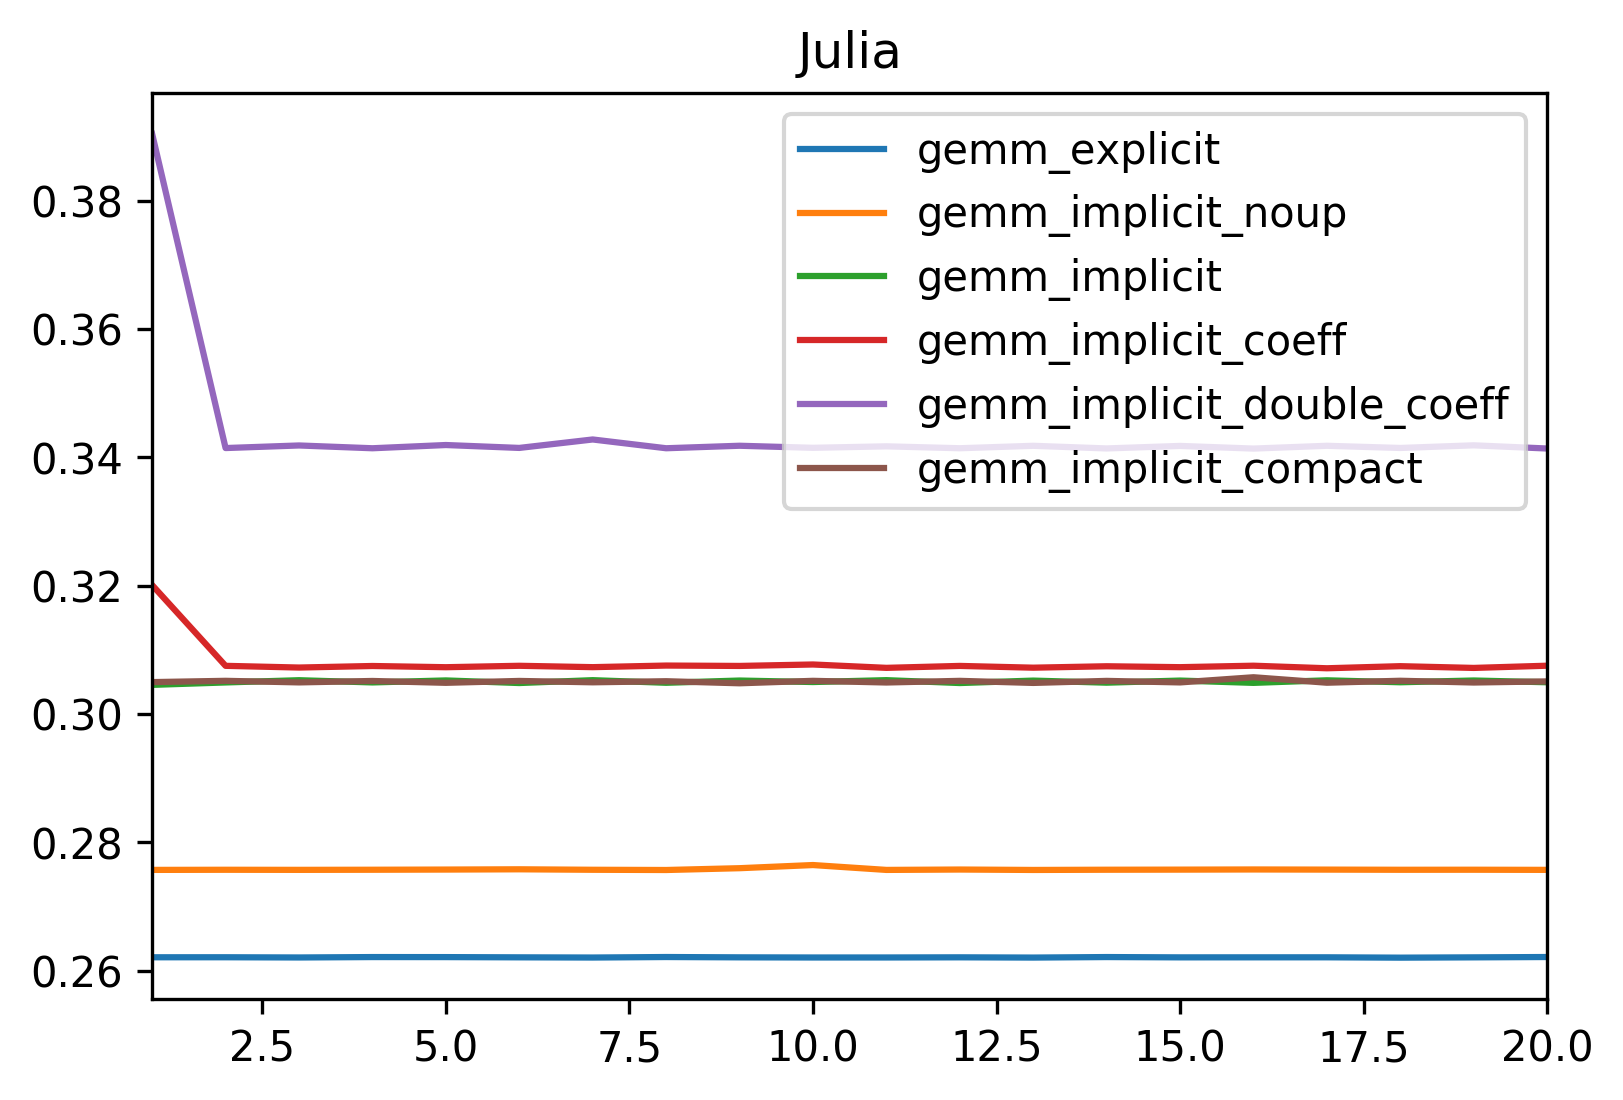

In [17]:
fig, ax = plt.subplots(dpi=dpi)
cols_to_use = [i for i in range(1, 21)]
keywords = ['gemm_explicit', 'gemm_implicit_noup', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff', 'gemm_implicit_compact']
for key in keywords:
    df_j_t[df_j_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
ax.legend(keywords)
ax.set_title('Julia')

(0.26, 0.4)

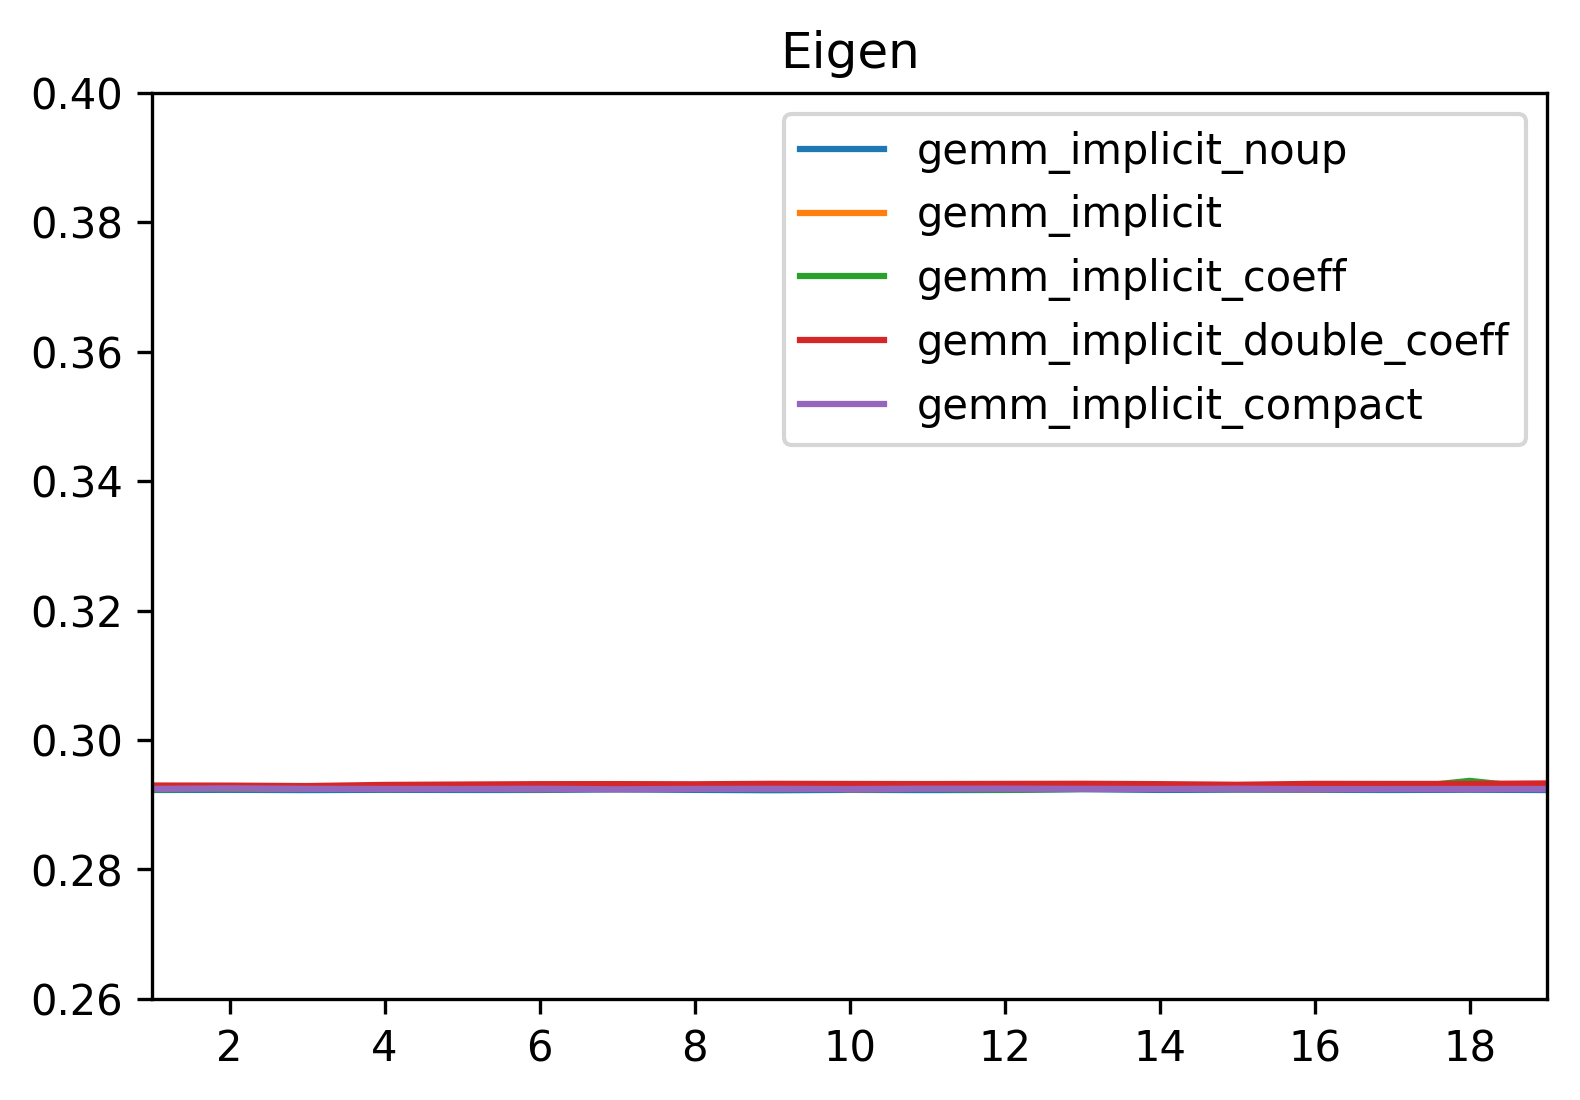

In [18]:
fig, ax = plt.subplots(dpi=dpi)
cols_to_use = [i for i in range(1, 20)]
keywords = ['gemm_implicit_noup', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff', 'gemm_implicit_compact']
for key in keywords:
    df_cppe_t[df_cppe_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
ax.legend(keywords)
ax.set_title('Eigen')
ax.set_ylim([0.26, 0.40])

(0.26, 0.3)

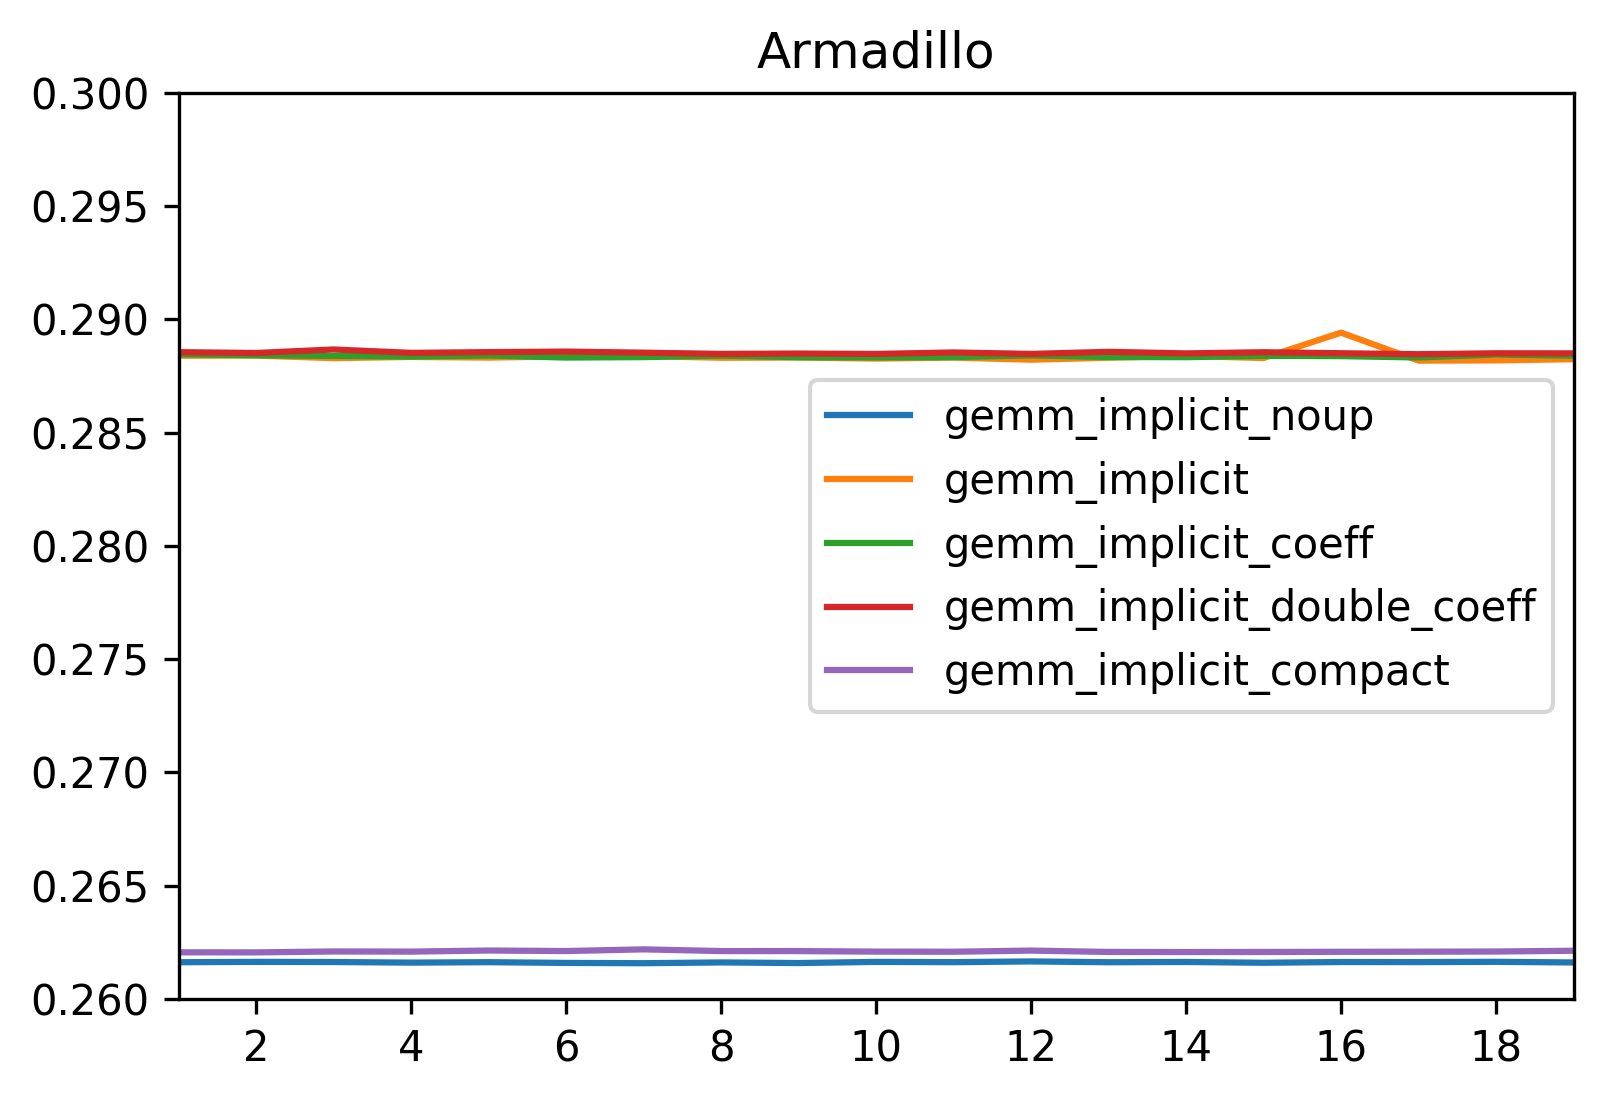

In [19]:
fig, ax = plt.subplots(dpi=dpi)
cols_to_use = [i for i in range(1, 20)]
keywords = ['gemm_implicit_noup', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff', 'gemm_implicit_compact']
for key in keywords:
    df_cppa_t[df_cppa_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
ax.legend(keywords)
ax.set_title('Armadillo')
ax.set_ylim([0.26, 0.30])

gemm_implicit
gemm_implicit_coeff
gemm_implicit_double_coeff


Text(0.5, 1.0, 'R')

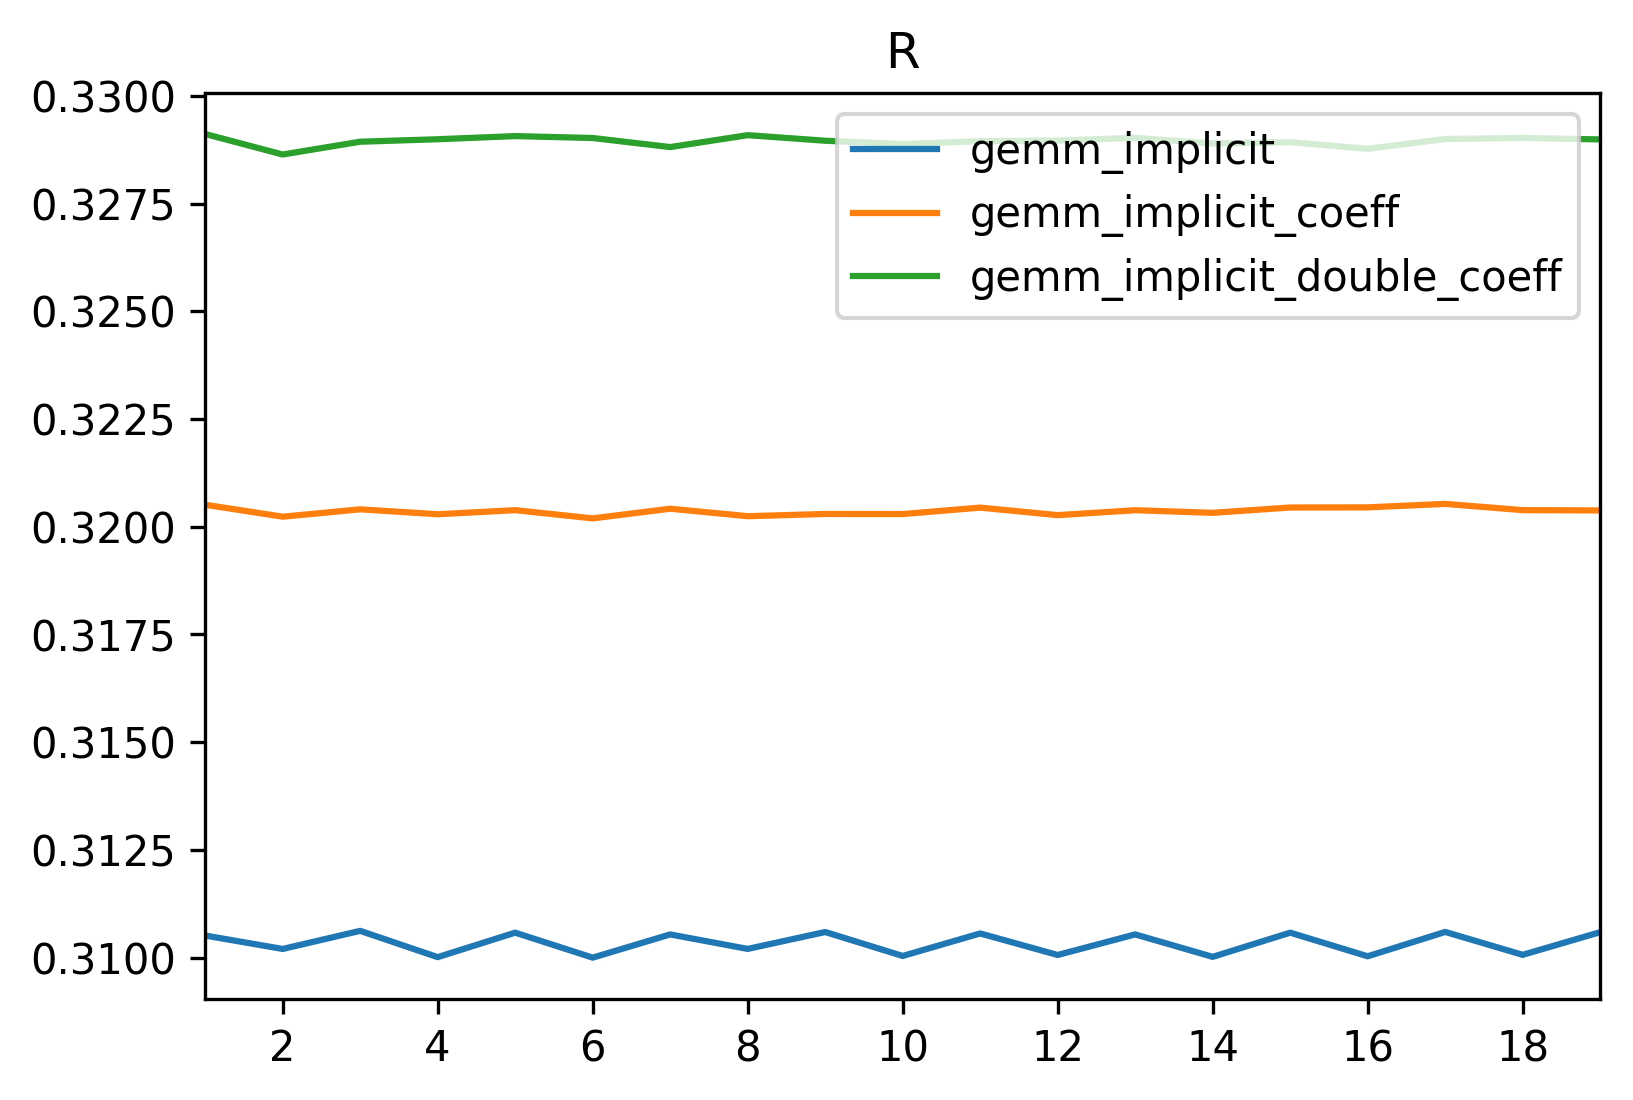

In [20]:
fig, ax = plt.subplots(dpi=dpi)
cols_to_use = [i for i in range(1, 20)]
keywords = ['gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff']
for key in keywords:
    print(key)
    df_r_t[df_r_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
ax.legend(keywords)
ax.set_title('R')

TypeError: Empty 'DataFrame': no numeric data to plot

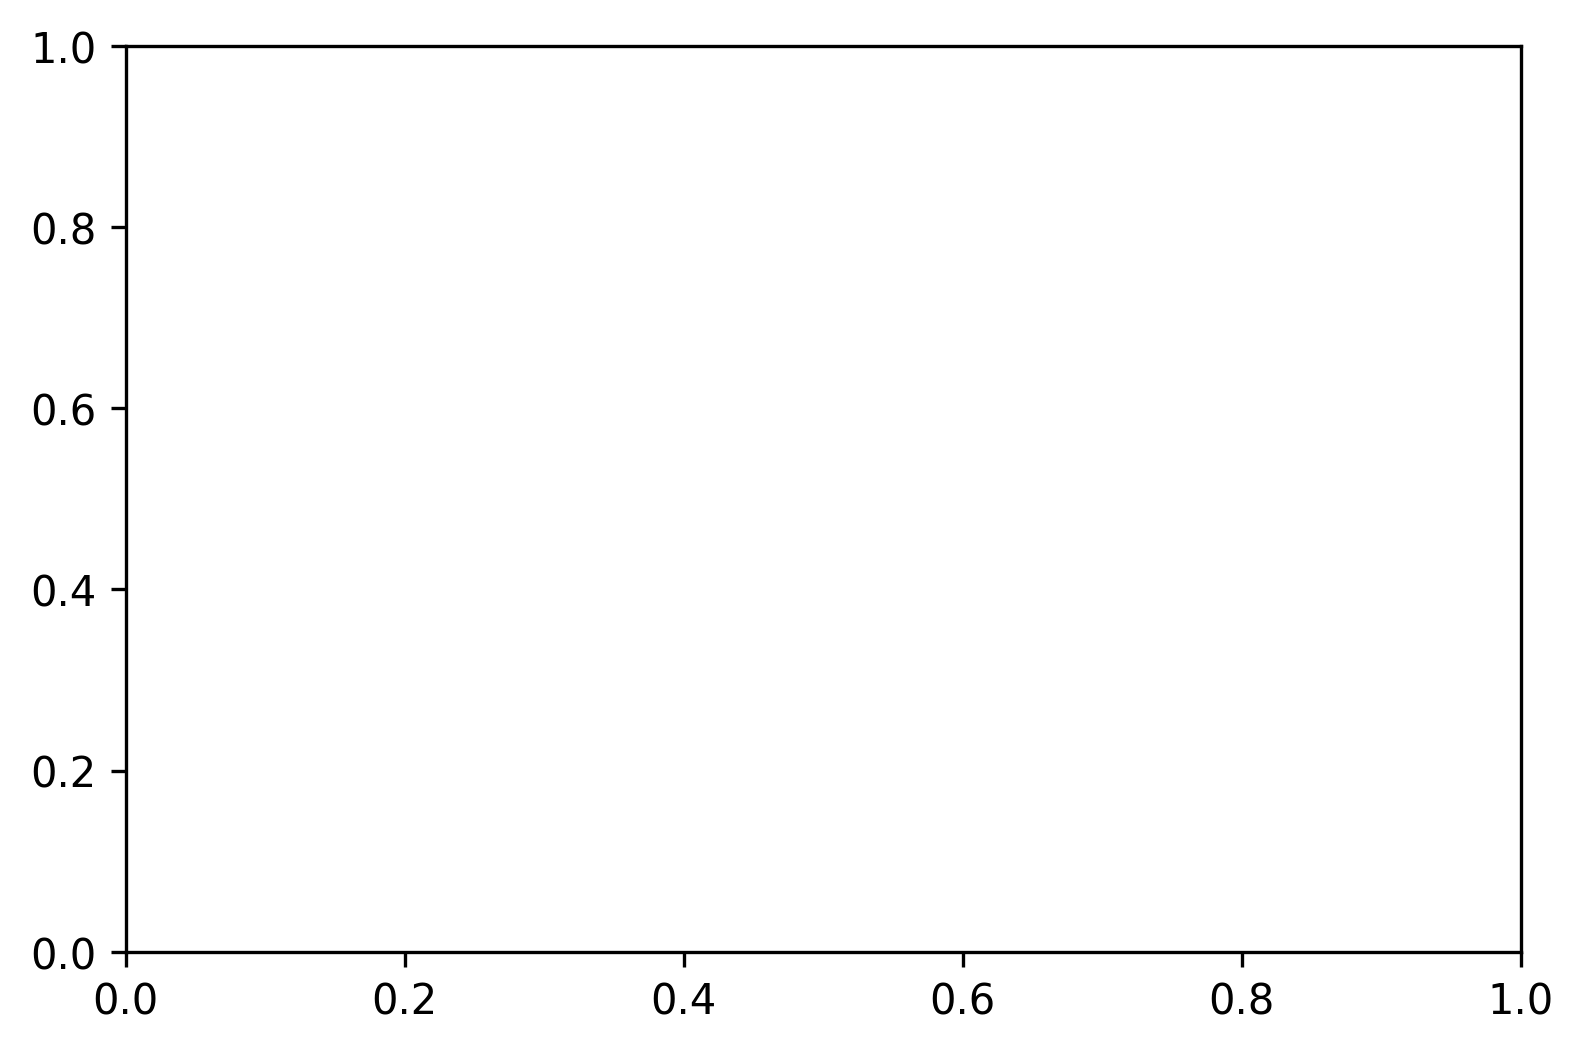

In [21]:
fig, ax = plt.subplots(dpi=dpi)
cols_to_use = [i for i in range(1, 21)]
keywords = ['gemm_explicit', 'gemm_implicit_noup', 'gemm_implicit', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff', 'gemm_implicit_compact']
for key in keywords:
    df_py_t[df_py_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
ax.legend(keywords)
ax.set_title('Python')

In [203]:
# fig, ax = plt.subplots(dpi=dpi)
# cols_to_use = [i for i in range(1, 21)]
# keywords = ['gemm_implicit', 'gemm_implicit_noup', 'gemm_implicit_coeff', 'gemm_implicit_double_coeff']
# for key in keywords:
#     print(key)
#     df_m_t[df_m_t[0] == key].loc[:, cols_to_use].transpose().plot(ax=ax)
# ax.legend(keywords)
# ax.set_title('Matlab')